# # Recognizing Handwritten Digits with scikit-learn

In this project we will be doing the analysis of handwitten digits on the Digits data and checking the hypothesis. The hypothesis states that the Digits data set of scikit-learn library provides numerous data-sets that are useful for testing many problems of data analysis and prediction of the results. Some Scientist claims that it predicts the digit accurately 95% of the times

Now Let's import our dataset

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

After loading the dataset, you can analyze the content. First, we can read lots of
information about the datasets by calling the DESCR attribute

In [2]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Each dataset in the scikit-learn library has a field containing all the
information

The images of the handwritten digits are contained in a digits.images array. Each
element of this array is an image that is represented by an 8x8 matrix of numerical values
that correspond to a grayscale from white, with a value of 0, to black, with the value 15.

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

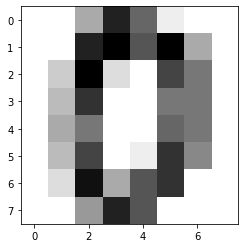

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

The numerical values represented by images, i.e., the targets, are contained in the
digit.targets array.

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

size of the dataset

In [6]:
digits.target.size


1797

This dataset contains 1,797 elements, and so we can consider the first 598 as a
training set and will use the next six as a validation set.
You can see in detail these six handwritten digits by using the matplotlib library:

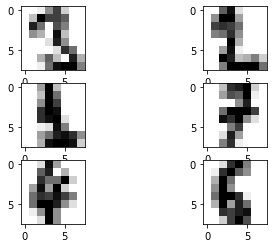

In [12]:
plt.subplot(321)
plt.imshow(digits.images[599], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[600], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[601], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[602], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[603], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[604], cmap=plt.cm.gray_r,
interpolation='nearest')


For prediction we will be using Support Vector Classifier(SVC)
now let's create the object of SVC

In [8]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

Now lets train our dataset

In [13]:
svc.fit(digits.data[1:598], digits.target[1:598])

SVC(C=100.0, gamma=0.001)

As our training is done now its time for prediction and testing our data

In [14]:
svc.predict(digits.data[599:604])

array([3, 2, 1, 7, 4])

Now lets compare with the actual values

In [15]:
digits.target[599:604]


array([3, 2, 1, 7, 4])

we will be testing on more train data and test data
Let's now train our model on data from 606 to 1000 and use the next 10 as validation data

In [17]:
svc.fit(digits.data[606:1000], digits.target[606:1000])

SVC(C=100.0, gamma=0.001)

In [18]:
svc.predict(digits.data[1001:1011])

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5])

Now lets have a look at original value

In [19]:
digits.target[1001:1011]

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5])

we are again  getting a 100% accuracy lets try once again now we will be using the data from 1012 to 1700 as training set and rest of the data for validation

In [20]:
svc.fit(digits.data[1012:1700], digits.target[1012:1700])

SVC(C=100.0, gamma=0.001)

In [23]:
p=svc.predict(digits.data[1701:1796])

Now the predicted data is stored in the variable p now we will be creating a loop which will have a variable count which will increment everytime when our predicted value will be equal to our actual value

In [26]:
s=digits.target[1701:1796]
count=0
for i in range(0,95):
    count+=1 if p[i]==s[i] else 0 
print("Accuracy=", (count/95)*100) 

Accuracy= 100.0


As we can see we tested our model three times with three different ranges of dataset and testing it on three different validation data and we got an accuracy of 100%.Therefore we can conclude that the Hypothesis is correct and the Digits data set of scikit-learn library provides numerous data-sets that are useful for testing many problems of data analysis and prediction of the results. Each time we got an accuracy above 95%